In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from datetime import datetime

In [2]:
data = pd.read_csv('AirPassengers.csv')
print(data.dtypes)

Month          object
#Passengers     int64
dtype: object


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

C:\Users\Hp\Anaconda3\envs\forecast\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

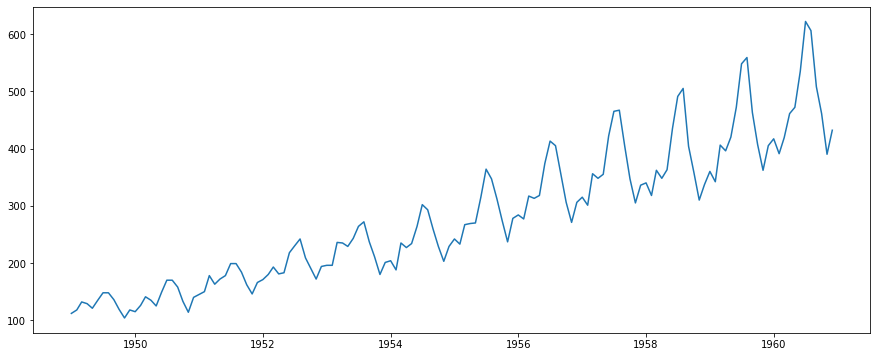

In [6]:
plt.plot(data)

In [7]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


## Viewing and analyzing the dataframe

In [8]:
data['1960'] # no of observations in 1960

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [9]:
data['1960-01'] #passegers in jan 1969

,#Passengers
Month,
1960-01-01,417


In [10]:
data[datetime(1959,1,1):] #observations after 1st Jan 1969

,#Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


In [11]:
data.resample('M').mean()

,#Passengers
Month,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461


Text(0, 0.5, 'Month')

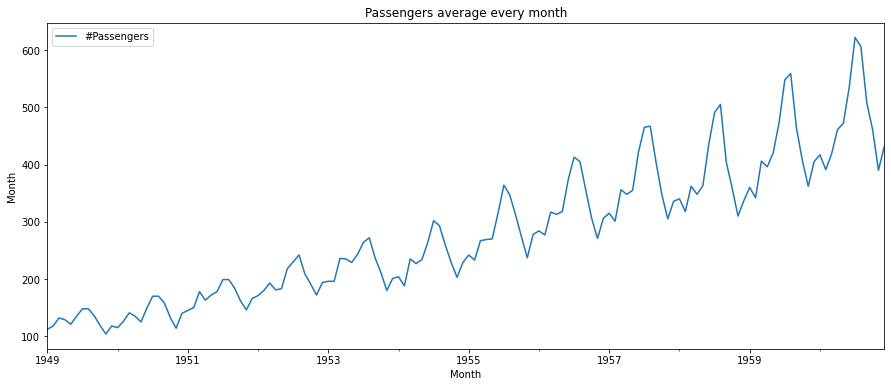

In [12]:
data.resample('M').sum().plot()
plt.title("Passengers average every month")
plt.ylabel("Month")


### sharp increase in number of airline passengers from 1949 to 1960
### In between there is seasonal pattern being observed in the data upto 1960 increase decline
### There is upward trend in the data
### Seasonal component is also present

# we would confirm the trend pattern using rolling averages

## Confirming Trend using rolling averages

Text(0.5, 0, 'Year')

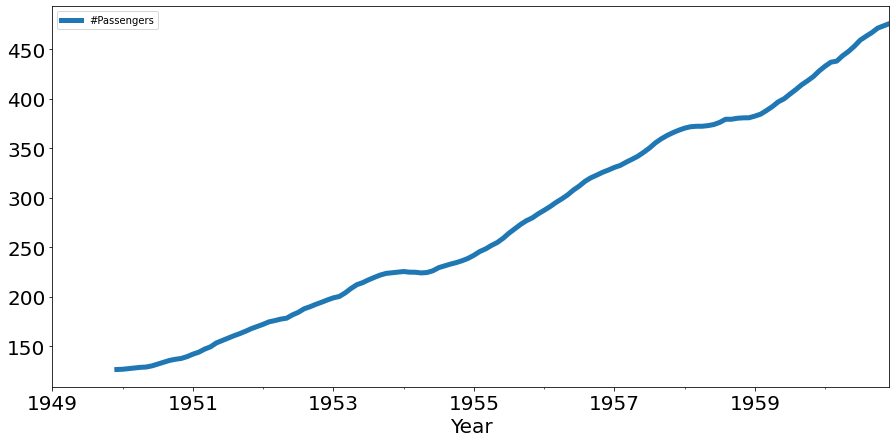

In [13]:
#which means that for each time point, you take the average of the points on either side

# no of passengers is increasing sharply, linear trend 
p= data[['#Passengers']]
p.rolling(12).mean().plot(figsize=(15,7), linewidth= 5, fontsize=20)
plt.xlabel('Year', fontsize=20)

## Confirming seasonal component

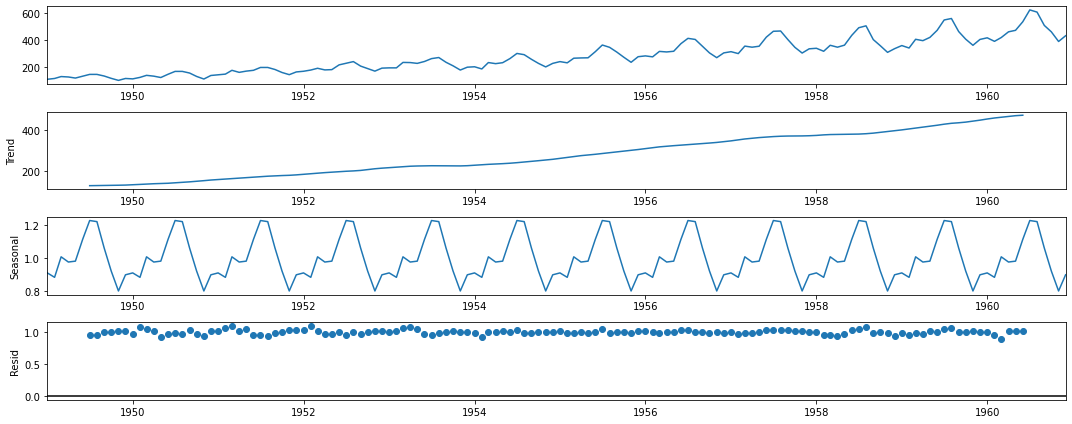

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data, model='multiplicative')

result.plot()
plt.show()

# Testing stationarity

In [15]:
# constant mean and constant variance  and auto c0-variance it does not depend on time

#### ADF Test
##Null Hypothesis (H0): If failed to be rejected (p>0.05), it suggests the ##time series has a unit root, meaning it is non-stationary

from statsmodels.tsa.stattools import adfuller
from pandas import Series

series = data['#Passengers']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
    
# so this data is not stationary

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
